In [ ]:
#Using the depression tweets dataset to analyse the tweeting habits of people with depression
#Resources
#Dataset from: https://www.kaggle.com/datasets/hyunkic/twitter-depression-dataset?select=clean_d_tweets.csv
#Analysing method from: https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression/notebook

In [256]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [257]:
depression = pd.read_csv("clean_d_tweets-1.csv")

In [258]:
depression.head()

,post_id,date,tweet,hashtags,nhashtags,user_id,weekday,hour,urls,photos,video,nlikes,nreplies,nretweets
0,1261620000000000000,2020/5/16 1:45,the real reason why you be sad you be attach t...,None,0,1012824523,6,1,0,0,0,13731,219,5642
1,1255540000000000000,2020/4/29 6:42,my biggest problem be overthinking everything,None,0,1012824523,3,6,0,0,0,12583,98,6951
2,1255520000000000000,2020/4/29 5:48,the worst sadness be the sadness you have teac...,None,0,1012824523,3,5,0,0,0,13350,51,7168
3,1255520000000000000,2020/4/29 5:47,i cannot make you understand i cannot make any...,None,0,1012824523,3,5,0,0,0,12926,56,8042
4,1172460000000000000,2019/9/13 0:52,i do not think anyone really understand how ti...,None,0,1012824523,5,0,0,0,0,21160,111,13344


In [259]:
depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_id    3059 non-null   int64 
 1   date       3059 non-null   object
 2   tweet      3059 non-null   object
 3   hashtags   3059 non-null   object
 4   nhashtags  3059 non-null   int64 
 5   user_id    3059 non-null   int64 
 6   weekday    3059 non-null   int64 
 7   hour       3059 non-null   int64 
 8   urls       3059 non-null   int64 
 9   photos     3059 non-null   int64 
 10  video      3059 non-null   int64 
 11  nlikes     3059 non-null   int64 
 12  nreplies   3059 non-null   int64 
 13  nretweets  3059 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 334.7+ KB


In [260]:
depression['post_id'] = depression['post_id'].astype('object')
depression['user_id'] = depression['user_id'].astype('object')

In [261]:
depression.shape

(3059, 14)

In [262]:
depression.describe()

,nhashtags,weekday,hour,urls,photos,video,nlikes,nreplies,nretweets
count,3059.000000,3059.000000,3059.000000,3059.000000,3059.000000,3059.000000,3059.000000,3059.000000,3059.000000
mean,0.006538,3.960445,12.161818,0.011442,0.050343,0.042824,1484.641713,3.950964,594.695652
std,0.119774,1.975671,6.482529,0.118028,0.272002,0.202494,3053.266935,11.038678,1397.934319
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.000000
50%,0.000000,4.000000,12.000000,0.000000,0.000000,0.000000,55.000000,0.000000,25.000000
75%,0.000000,6.000000,18.000000,0.000000,0.000000,0.000000,1488.500000,4.000000,696.500000
max,4.000000,7.000000,23.000000,2.000000,4.000000,1.000000,32345.000000,219.000000,24881.000000


In [263]:
depression.date=depression.date.apply(pd.to_datetime)
depression["month"]=depression.date.dt.month
depression["year"]=depression.date.dt.year
depression["time"]=depression.date.dt.time
depression.drop("date", axis=1, inplace=True)

In [264]:
depression.head()

,post_id,tweet,hashtags,nhashtags,user_id,weekday,hour,urls,photos,video,nlikes,nreplies,nretweets,month,year,time
0,1261620000000000000,the real reason why you be sad you be attach t...,None,0,1012824523,6,1,0,0,0,13731,219,5642,5,2020,01:45:00
1,1255540000000000000,my biggest problem be overthinking everything,None,0,1012824523,3,6,0,0,0,12583,98,6951,4,2020,06:42:00
2,1255520000000000000,the worst sadness be the sadness you have teac...,None,0,1012824523,3,5,0,0,0,13350,51,7168,4,2020,05:48:00
3,1255520000000000000,i cannot make you understand i cannot make any...,None,0,1012824523,3,5,0,0,0,12926,56,8042,4,2020,05:47:00
4,1172460000000000000,i do not think anyone really understand how ti...,None,0,1012824523,5,0,0,0,0,21160,111,13344,9,2019,00:52:00


In [265]:
!pip install wordcloud
from wordcloud import WordCloud

In [266]:
text = " ".join(i for i in depression.tweet)

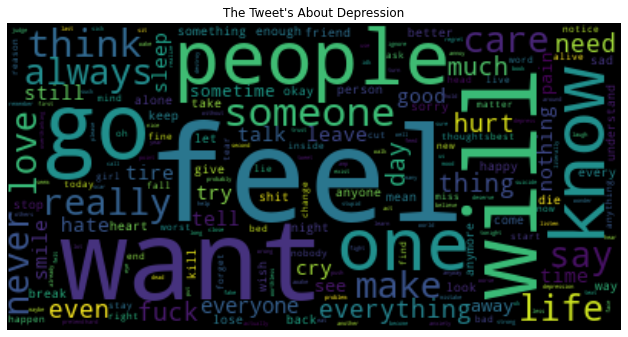

In [267]:
wordcloud = WordCloud(collocations=False).generate(text)
plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression")
plt.show()

In [268]:
weekday_df = depression.groupby("weekday").count().reset_index()

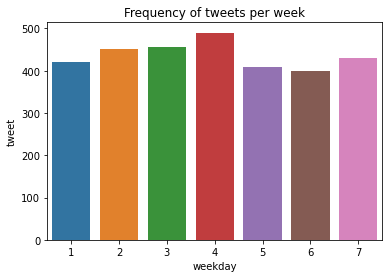

In [269]:
sns.barplot(data=weekday_df, x="weekday", y="tweet").set(title="Frequency of tweets per week");

In [270]:
month_df = depression.groupby("month").count().reset_index()

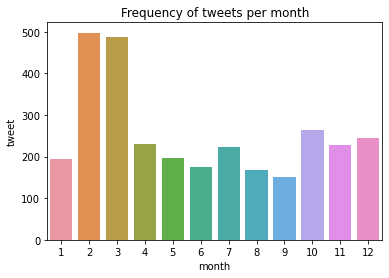

In [271]:
sns.barplot(data=month_df, x="month", y="tweet").set(title="Frequency of tweets per month");

In [272]:
year_df = depression.groupby("year").count().reset_index()

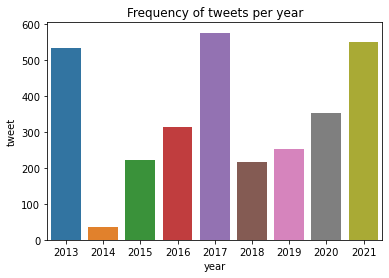

In [273]:
sns.barplot(data=year_df, x="year", y="tweet").set(title="Frequency of tweets per year");

In [274]:
hour_df = depression.groupby("hour").count().reset_index()

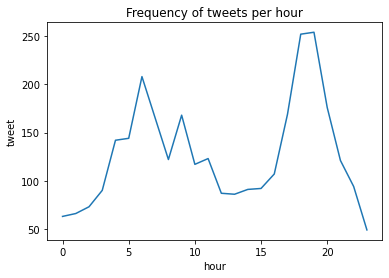

In [275]:
sns.lineplot(data=hour_df, x="hour", y="tweet").set(title="Frequency of tweets per hour");

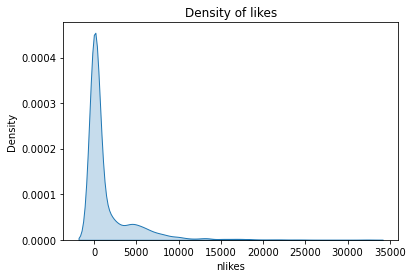

In [276]:
sns.kdeplot(x=depression.nlikes, shade=True,).set(title="Density of likes");

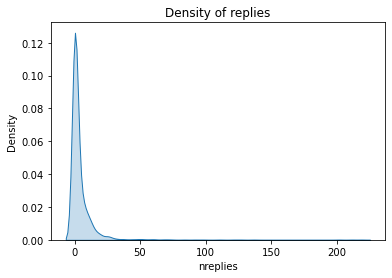

In [277]:
sns.kdeplot(x=depression.nreplies, shade=True,).set(title="Density of replies");

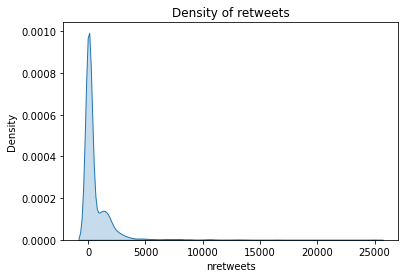

In [278]:
sns.kdeplot(x=depression.nretweets, shade=True,).set(title="Density of retweets");

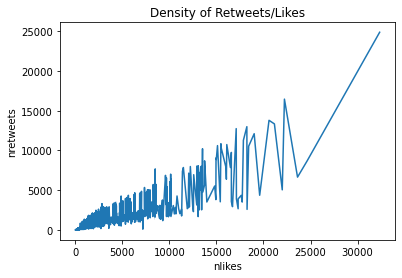

In [279]:
sns.lineplot(data=depression, x="nlikes", y="nretweets").set(title="Density of Retweets/Likes");

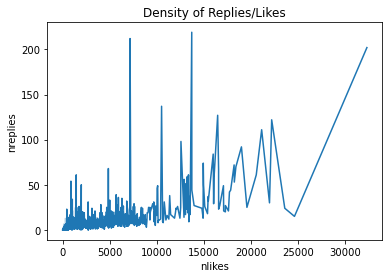

In [280]:
sns.lineplot(data=depression, x="nlikes", y="nreplies").set(title="Density of Replies/Likes");